In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("advertising (1).csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

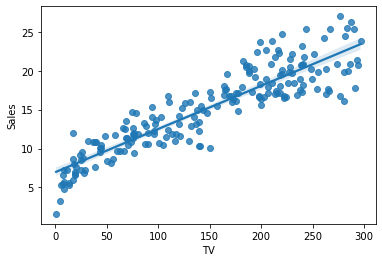

In [25]:
sns.regplot(x='TV' , y='Sales' , data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

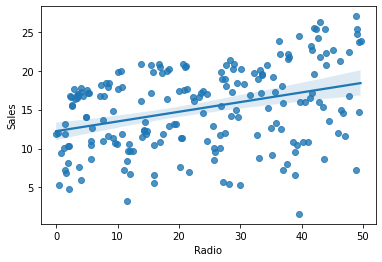

In [7]:
sns.regplot(x='Radio' , y='Sales' , data=df)

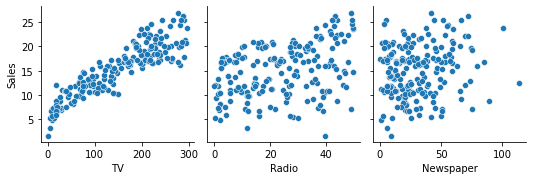

In [8]:
sns.pairplot(data=df , x_vars = ['TV' , 'Radio' , 'Newspaper'] , y_vars= 'Sales')

<AxesSubplot:>

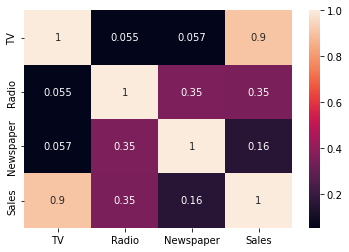

In [9]:
sns.heatmap(df.corr() ,annot=True)

In [10]:
#create x and y

X = df['TV']
y = df['Sales']


In [11]:
#train text split
X_train ,X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , random_state=100)

In [12]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [13]:
#training 

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\Users\MOHIT SINGH\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
#fit_model
lr = sm.OLS(y_train , X_train_sm)
lr_model =lr.fit()
lr_model.params
# sales = 6.94 + 0.054*TV

const    6.948683
TV       0.054546
dtype: float64

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.52e-52
Time:                        19:12:19   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
y_train_predict = lr_model.predict(X_train_sm)

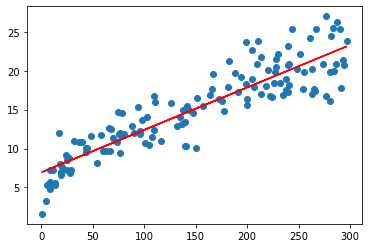

In [23]:
# 6.9487  + 0.05*X_train
plt.scatter(X_train,y_train)
plt.plot(X_train , y_train_predict , 'r')

In [27]:
res = y_train - y_train_predict
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

C:\Users\MOHIT SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

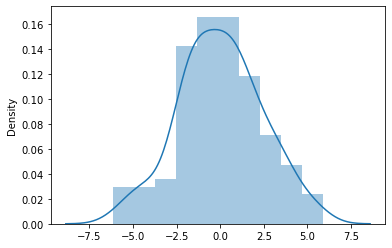

In [30]:
plt.figure()
sns.distplot(res)

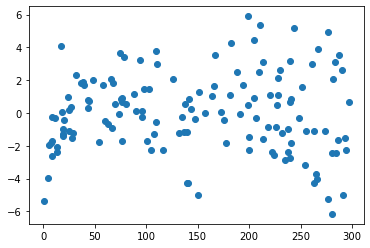

In [33]:
#we should not identify any pattern
plt.scatter( X_train ,res)

In [34]:
#testing

X_test_sm = sm.add_constant(X_test)

y_test_predict = lr_model.predict(X_test_sm)

C:\Users\MOHIT SINGH\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
#evalution on r square for test prediction
r2 = r2_score(y_true=y_test , y_pred= y_test_predict)
r2

0.7921031601245658

In [39]:
#evalution on r square for test prediction
rr2 = r2_score(y_true= y_train , y_pred=y_train_predict)
rr2

0.8157933136480389

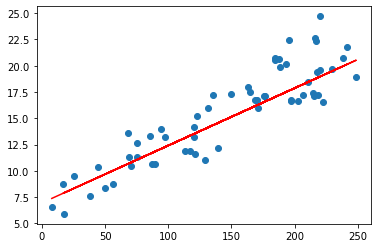

In [41]:
plt.scatter(X_test , y_test)
plt.plot(X_test , y_test_predict,'r')
plt.show()

### linear regression with the help of sklearn

In [43]:
#test and train split

X_train ,X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , random_state=100)

In [44]:
lm= LinearRegression()

In [47]:
#reshape 
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm = X_train.values.reshape(-1,1)

In [49]:
lm.fit(X_train_lm , y_train)

LinearRegression()

In [50]:
lm.coef_

array([0.05454575])

In [51]:
lm.intercept_

6.948683200001357

In [57]:
y_tst_predict = lm.predict(X_test_lm)
y_trn_predict = lm.predict(X_train_lm)

In [58]:
rlm = r2_score(y_true=y_test , y_pred=y_tst_predict)
rln = r2_score(y_true=y_train , y_pred=y_trn_predict)

In [59]:
print(rlm,rln)

0.7921031601245662 0.8157933136480389
